## Experimento 6

#### Ubicación
* **Latitud:** 7.1332058 N
* **Longitud:** 73.1156701 O
* **Descripción:** La prueba se realizo en el barrio San Alonso, Bucaramanga, en el edificio OSKADE, en el segundo piso.

#### Objetivo
Encontrar la linea base, comparar los datos de las dos estaciones cuando estas estan en las mismas condiciones, una junto a la otra. Para este caso particular estaban destapadas.

#### Descripción del Experimento
|  paso  |  hora_inicio  |  hora_fin  |  Descripción  |
|--------|---------------|------------|---------------|
| 1  |  15:30    | 16:05  |Puerta y ventana cerradas, se midio teniendo las dos estaciones destapadas|
| 2  | 16:15      | 16:45  | Puerta y ventana cerradas, se midio teniendo las dos estaciones destapadas, pero esta ves se quemo un cuadro de papel de 5x5 cm| 
| 3  | 17:15 | 17:45 | Puerta y ventana cerradas, se midio teniendo teniedo a *indoor* con tapa y *outdoor* destapada. Se quemo un cuadro de papel de 5x5 cm|
| 4  | 18:30 | 19:05  | Puerta y ventanas cerradas, se midio teniendo ambas estaciones tapadas. Se quemo un cuadro de pepel de 5x5 cm|

#### Dimensiones
**Habitación**

|Ancho| Largo | Alto |
|-----|-------|------|
| 246 cm | 290 cm | 242 cm  |

** Ventana **

|Nivel| Ancho | Alto |
|-----|-------|------|
| 1   | 13 cm | 117 cm|
| 2   | 26 cm | 117 cm|
| 3   | 57 cm | 117 cm|

**Puerta**

| Ancho | Alto |
|-------|------|
| 73 cm | 200 cm|

<center><img src="UbicacionEstaciones.jpeg " width=50%></center>


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from datetime import datetime
import numpy
import itertools

#importa configuracion
import os,sys
sys.path.append("../")
from common import config, get_medicion

#importa un modulo para visualizar de forma rapida 
sys.path.insert(0,'../../../')
import VisualizacionRapida as Vr

In [2]:
config_ = config(os.getcwd().replace("\\",'/'))
start = config_['date_init']
end = config_['date_end']

indoor =pd.read_csv("../../../indoor.csv")
outdoor =pd.read_csv("../../../outdoor.csv")
indoor['fecha_hora_med'] = pd.to_datetime(indoor['fecha_hora_med'])
outdoor['fecha_hora_med'] = pd.to_datetime(outdoor['fecha_hora_med'])
indoor.index = indoor['fecha_hora_med']
indoor.resample('1Min', closed='right').mean()

outdoor.index = outdoor['fecha_hora_med']
outdoor.resample('1Min', closed='right').mean()

indoor = indoor.loc[start:end]
outdoor = outdoor.loc[start:end]

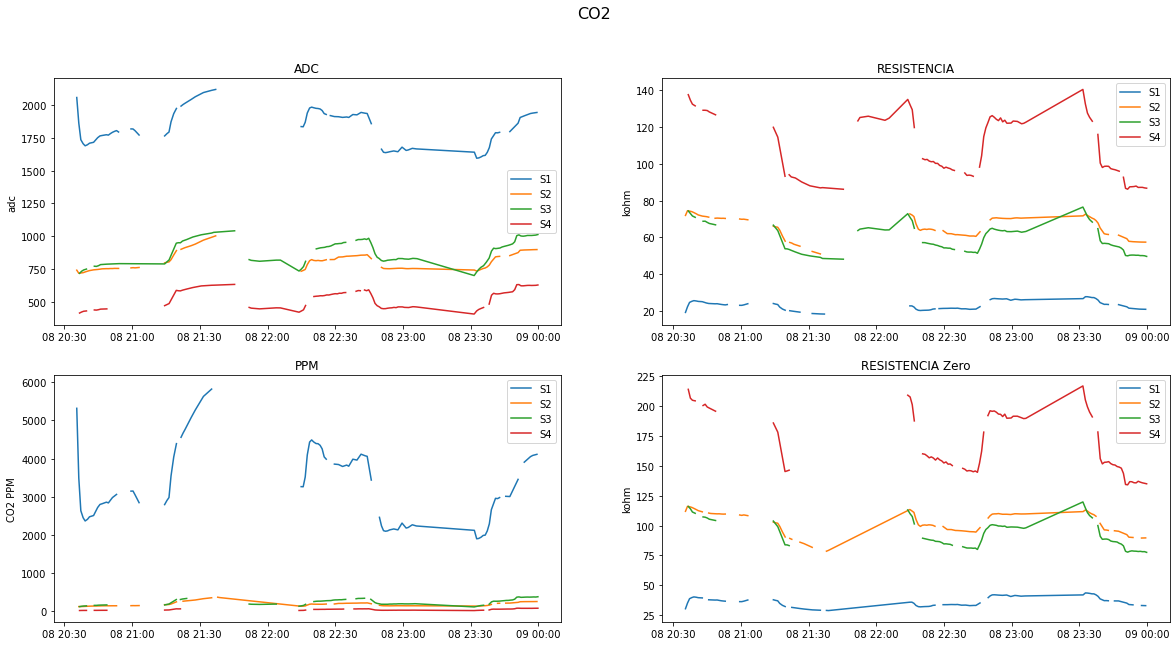

In [3]:
Vr.VisualizacionCO2(indoor,outdoor,n=0)

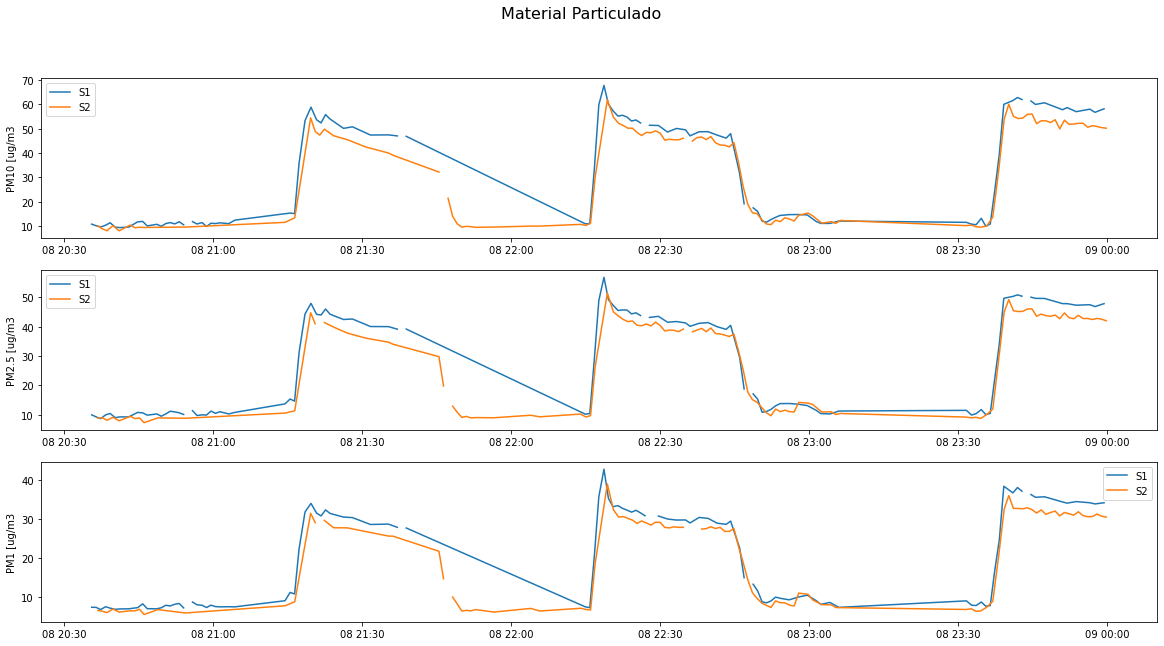

In [4]:
Vr.VisualizacionMP(indoor,outdoor,n=0)

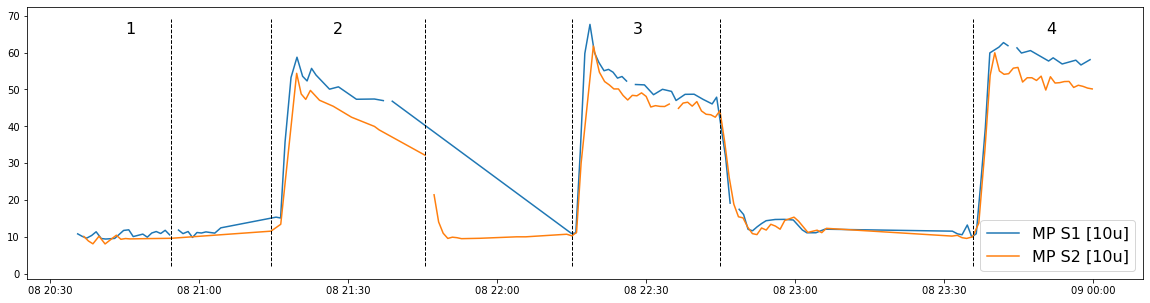

In [5]:
plt.figure(figsize=(20,5))
plt.plot(indoor['pm10_0_au'], label = 'MP S1 [10u]')
plt.plot(outdoor['pm10_0_au'], label = 'MP S2 [10u]')
plt.plot([outdoor.index[10] for i in range(2,70)] ,[i for i in range(2,70)],color ='k',lw =1,ls='--')
plt.annotate('1',xy = (outdoor.index[7] ,65),fontsize = 16) 
plt.plot([outdoor.index[11] for i in range(2,70)] ,[i for i in range(2,70)],color ='k',lw =1,ls='--')
plt.annotate('2',xy = (outdoor.index[18] ,65),fontsize = 16) 
plt.plot([outdoor.index[22] for i in range(2,70)] ,[i for i in range(2,70)],color ='k',lw =1,ls='--')
plt.plot([outdoor.index[35] for i in range(2,70)] ,[i for i in range(2,70)],color ='k',lw =1,ls='--')
plt.annotate('3',xy = (outdoor.index[46] ,65),fontsize = 16) 
plt.plot([outdoor.index[65] for i in range(2,70)] ,[i for i in range(2,70)],color ='k',lw =1,ls='--')
plt.plot([outdoor.index[90] for i in range(2,70)] ,[i for i in range(2,70)],color ='k',lw =1,ls='--')
plt.annotate('4',xy = (outdoor.index[105] ,65),fontsize = 16) 
plt.legend(fontsize = 16)
plt.show()

Timestamp('2020-12-08 23:31:31+0000', tz='UTC')